In [1]:
#Importing the required modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading the preprocessed data from previous assignment
amazon_data = pd.read_csv('final_data.csv')
amazon_data = amazon_data.drop([31393,294985,341395])
amazon_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,b'bought sever vital can dog food product foun...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,b'product arriv label jumbo salt peanut peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,b'confect around centuri light pillowi citrus ...
3,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...,b'great taffi great price wide assort yummi ta...
4,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,positive,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,b'got wild hair taffi order five pound bag taf...


### Sorting data based on timestamps

In [3]:
#Sorting the data as per timestamps
balanced_sorted_data = amazon_data.sort_values(by='Time',kind='quicksort',ascending=True,axis=0,inplace=False).reset_index(drop=True)
balanced_sorted_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,451856,B00004CXX9,AIUWLEQ1ADEG5,Elizabeth Medina,0,0,positive,944092800,Entertainingl Funny!,Beetlejuice is a well written movie ..... ever...,b'beetlejuic well written movi everyth act spe...
1,374359,B00004CI84,A344SMIA5JECGM,Vincent P. Ross,1,2,positive,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",b'twist rumplestiskin captur film star michael...
2,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,positive,946857600,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,b'beetlejuic excel funni movi keaton hilari wa...
3,374422,B00004CI84,A1048CYU0OV4O8,Judy L. Eans,2,2,positive,947376000,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,b'one movi movi collect fill comedi action wha...
4,374343,B00004CI84,A1B2IZU1JLZA6,Wes,19,23,negative,948240000,WARNING: CLAMSHELL EDITION IS EDITED TV VERSION,"I, myself always enjoyed this movie, it's very...",b'alway enjoy movi funni entertain hesit pick ...


In [4]:
balanced_data_score = balanced_sorted_data.Score
balanced_data_score.value_counts()

positive    307029
negative     57105
Name: Score, dtype: int64

In [5]:
#Removing the Score column
balanced_sorted_data = balanced_sorted_data.drop(columns='Score')

In [6]:
#Sampling first 100k rows of sorted data into train and test data
balanced_train_data = balanced_sorted_data.iloc[:70000,:]
balanced_train_label = balanced_data_score[:70000]
balanced_test_data = balanced_sorted_data.iloc[70000:100000,:]
balanced_test_label = balanced_data_score[70000:100000]

# Bag of Words(BOW)

In [7]:
#Training and transforming the training data
from sklearn.feature_extraction.text import CountVectorizer
bow_model =CountVectorizer(dtype='float')
bow_train_data = bow_model.fit_transform(balanced_train_data.CleanedText)
bow_train_data.shape

(70000, 32552)

In [8]:
#Transforming the test data
bow_test_data = bow_model.transform(balanced_test_data.CleanedText)
bow_test_data.shape

(30000, 32552)

### 1. Applying BOW with GridSearchCV & L2 Regularizer

In [9]:
#Applying GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
log_model = LogisticRegression()
parameters = {'C':[10**(-3),10**(-2),10**(-1),10**0,10**1,10**2,10**3,10**4]}
grid_clf = GridSearchCV(log_model,parameters,scoring='accuracy')

In [10]:
#Fitting the gridsearch model
grid_clf.fit(bow_train_data,balanced_train_label)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [11]:
grid_clf.best_params_

{'C': 0.1}

In [12]:
grid_clf.cv_results_

F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessi

{'mean_fit_time': array([ 0.98283211,  0.91813588,  2.36696124,  5.71936456, 11.37742956,
        12.05470467, 12.17297125, 12.18895666]),
 'std_fit_time': array([0.4626642 , 0.04863641, 0.14354863, 0.52638   , 0.55410699,
        1.06430762, 1.50755382, 1.06277174]),
 'mean_score_time': array([0.05929971, 0.06429609, 0.04963779, 0.05430166, 0.05730065,
        0.05163797, 0.06696105, 0.05996561]),
 'std_score_time': array([0.00740456, 0.01696679, 0.0004712 , 0.00367995, 0.00966675,
        0.00124753, 0.01495834, 0.01079482]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000},
  {'C': 10000}],
 'split0_test_score': array([0.88566041, 0.90743122, 0.92170224, 0.92157367, 0.91334533,
        0.90978829, 0.91000257, 0.9076455 ]),
 

In [13]:
mean_test_scores_bow = grid_clf.cv_results_['mean_test_score']

In [14]:
MSE = 1 - mean_test_scores_bow

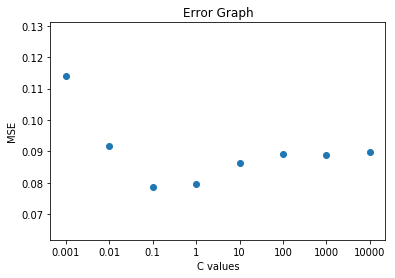

In [15]:
#Showing the error plot for test data
dumm_points = [1,2,3,4,5,6,7,8]
plt.scatter(dumm_points,MSE)
param_str = [str(i) for i in parameters['C']]
plt.xlabel('C values')
plt.title('Error Graph')
plt.xticks(range(1,9),param_str)
plt.ylabel('MSE')
plt.show()

In [16]:
#Fitting the train data with best paramaeter
bow_log_model = LogisticRegression(C=0.1,penalty='l2')
bow_log_model.fit(bow_train_data,balanced_train_label)
bow_log_labels = bow_log_model.predict(bow_test_data)

In [17]:
#Finding the accuracy with test data
from sklearn.metrics import accuracy_score
score_bow_test = accuracy_score(balanced_test_label,bow_log_labels)*float(100)
print("The accuracy of the test data with Bag of Words model is -----> "+str(score_bow_test))

The accuracy of the test data with Bag of Words model is -----> 91.66333333333333


In [18]:
#Finding the accuracy with train data
bow_log_train_labels = bow_log_model.predict(bow_train_data)
score_bow_train = accuracy_score(balanced_train_label,bow_log_train_labels)*float(100)
print("The accuracy of the train data with Bag of Words model is -----> "+str(score_bow_train))

The accuracy of the train data with Bag of Words model is -----> 93.91428571428571


### 2. Applying Pertubation Technique for checking multicollinearity

In [31]:
#Sampling data
balanced_pertub_data = balanced_sorted_data.iloc[:5600,:]
balanced_pertub_label = balanced_data_score[:5600]

In [32]:
#Applying BOW on pertub data
from sklearn.feature_extraction.text import CountVectorizer
bow_mod = CountVectorizer(dtype='float')
bow_mod_data = bow_mod.fit_transform(balanced_pertub_data.CleanedText)
bow_mod_data.shape

(5600, 11596)

In [43]:
#Normal model
bow_log_mod = LogisticRegression(C=0.1,penalty='l2')
bow_log_mod.fit(bow_mod_data,balanced_pertub_label)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
#Building pertubation matrix
epsi = np.random.normal(loc=0.0,scale=0.00000001,size=bow_mod_data.shape)  #Loss to be added with the data
pertubated_bow_data = bow_mod_data + epsi
pertubated_bow_data.shape

(5600, 11596)

In [45]:
from sklearn.linear_model import LogisticRegression
bow_pertubated_model = LogisticRegression(C=0.1,penalty='l2')
bow_pertubated_model.fit(pertubated_bow_data,balanced_pertub_label)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
var = np.var(bow_log_mod.coef_[0])
var

0.0043841832710737935

In [47]:
varp = np.var(bow_pertubated_model.coef_[0])
varp

0.004384183276672018

In [57]:
#Calculating percentage change in wieghts for each feature
wt_change = (bow_pertubated_model.coef_[0]-bow_log_mod.coef_[0])/(bow_log_mod.coef_[0])
wt_change

array([-3.44544657e-06, -5.08444797e-03, -3.79620879e-06, ...,
       -6.26533622e-04,  3.13711996e-05,  5.03614196e-07])

### Conclusion: The data is not multicollinear as both the variance are nearly similar

### 3.  Finding important features

In [185]:
#Getting important words for positive and negative class
pos_imp_words = bow_log_model.coef_[bow_log_model.coef_>0]
neg_imp_words = bow_log_model.coef_[bow_log_model.coef_<0]

In [181]:
#Function to get important postive words
def getposWords(pos_imp_words):
    x = sorted(pos_imp_words,reverse=True)
    y = x[0:10]
    indices = []
    for i in y:
        index = np.where(bow_log_model.coef_==i)
        indices.append(index[1])
    return indices

In [190]:
#Function to get important negative words
def getnegWords(neg_imp_words):
    x = sorted(neg_imp_words)
    y = x[0:10]
    indices = []
    for i in y:
        index = np.where(bow_log_model.coef_==i)
        indices.append(index[1])
    return indices

In [191]:
#Getting top 10 positive words
imp_words_pos = np.take(bow_model.get_feature_names(),getposWords(pos_imp_words))
imp_words_pos

array([['perfect'],
       ['excel'],
       ['delici'],
       ['amaz'],
       ['best'],
       ['great'],
       ['addict'],
       ['smooth'],
       ['nice'],
       ['hook']], dtype='<U36')

In [192]:
#Getting top 10 negative words
imp_words_neg = np.take(bow_model.get_feature_names(),getnegWords(neg_imp_words))
imp_words_neg

array([['worst'],
       ['terribl'],
       ['disappoint'],
       ['bland'],
       ['aw'],
       ['threw'],
       ['horribl'],
       ['unfortun'],
       ['stale'],
       ['sorri']], dtype='<U36')

### 4. Applying L1 Regularizer on BOW data

In [199]:
#Applying l1 regularizer to build a model
bow_model_l1 = LogisticRegression(penalty='l1',C=1)
bow_model_l1.fit(bow_train_data,balanced_train_label)
sparse_coef = bow_model_l1.coef_
np.count_nonzero(sparse_coef)

732

In [200]:
bow_model_l1 = LogisticRegression(penalty='l1',C=0.1)
bow_model_l1.fit(bow_train_data,balanced_train_label)
sparse_coef = bow_model_l1.coef_
np.count_nonzero(sparse_coef)

117

In [201]:
bow_model_l1 = LogisticRegression(penalty='l1',C=0.01)
bow_model_l1.fit(bow_train_data,balanced_train_label)
sparse_coef = bow_model_l1.coef_
np.count_nonzero(sparse_coef)

4

### Conclusion: As C decreases or lambda increases the sparsity of the weight vector increases

### 5. Applying RandomizedSearchCV

In [22]:
rand_params = {'C': np.random.uniform(0,1,50)}
rand_clf = RandomizedSearchCV(log_model,rand_params,scoring='accuracy')

In [23]:
rand_clf.fit(bow_train_data,balanced_train_label)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'C': array([0.56532, 0.01319, 0.12341, 0.74131, 0.63528, 0.7782 , 0.94116,
       0.72031, 0.78563, 0.08557, 0.16237, 0.93276, 0.1252 , 0.73959,
       0.10862, 0.42526, 0.34317, 0.11074, 0.71698, 0.25038, 0.74519,
       0.74221, 0.62873, 0.80429, 0.75101, 0.56491, 0.01435, 0.6...35, 0.60859,
       0.03895, 0.67482, 0.25016, 0.21831, 0.91698, 0.05509, 0.15197,
       0.09521])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [24]:
rand_clf.best_params_

{'C': 0.25016145103107024}

In [25]:
mean_test_scores_bow_rand = rand_clf.cv_results_['mean_test_score']

In [26]:
MSE = 1 - mean_test_scores_bow_rand
rand_par = rand_clf.cv_results_['params']
rand_par = [i['C'] for i in rand_par]

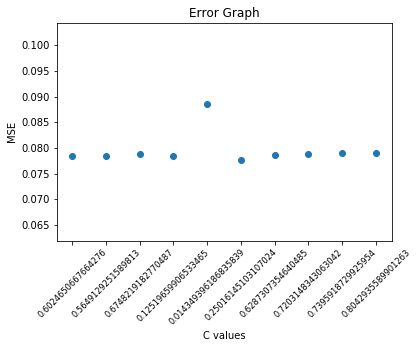

In [27]:
#Showing the error plot for test data
dumm_points = list(range(0,10))
plt.scatter(dumm_points,MSE)
param_str = [str(i) for i in rand_par]
plt.xlabel('C values')
plt.title('Error Graph')
plt.xticks(range(0,10),param_str,size='small',rotation='45')
plt.ylabel('MSE')
plt.show()

In [28]:
#Building the model with best C
bow_log_model_rand = LogisticRegression(C= 0.3139696995907474,penalty='l2')
bow_log_model_rand.fit(bow_train_data,balanced_train_label)
bow_log_labels_rand = bow_log_model_rand.predict(bow_test_data)

In [29]:
score_bow_test_rand = accuracy_score(balanced_test_label,bow_log_labels_rand)*float(100)
print("The accuracy of the test data with Bag of Words model is -----> "+str(score_bow_test_rand))

The accuracy of the test data with Bag of Words model is -----> 91.84333333333333


In [30]:
#Finding the accuracy with train data
bow_log_train_labels_rand = bow_log_model_rand.predict(bow_train_data)
score_bow_train_rand = accuracy_score(balanced_train_label,bow_log_train_labels)*float(100)
print("The accuracy of the train data with Bag of Words model is -----> "+str(score_bow_train_rand))

The accuracy of the train data with Bag of Words model is -----> 93.91428571428571


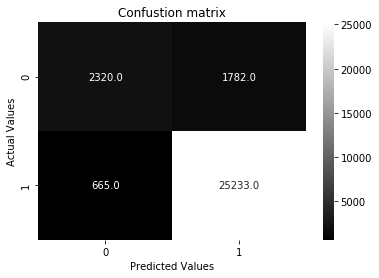

In [31]:
#Building the Confustion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cnf_bow_rand = confusion_matrix(balanced_test_label,bow_log_labels_rand)
sns.heatmap(cnf_bow_rand,cmap=plt.cm.gray,annot=True,fmt='.1f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confustion matrix')
plt.show()

In [32]:
#Finding the tnr,fpr,fnr,tpr
tnr_bow_rand = cnf_bow_rand[0,0] 
fpr_bow_rand = cnf_bow_rand[0,1] 
fnr_bow_rand = cnf_bow_rand[1,0] 
tpr_bow_rand = cnf_bow_rand[1,1] 
print('The TNR for BOW is '+str(tnr_bow_rand))
print('The FPR for BOW is '+str(fpr_bow_rand))
print('The FNR for BOW is '+str(fnr_bow_rand))
print('The TPR for BOW is '+str(tpr_bow_rand))

The TNR for BOW is 2320
The FPR for BOW is 1782
The FNR for BOW is 665
The TPR for BOW is 25233


In [33]:
#Finding Precision and Recall
precision_bow_rand = tpr_bow_rand/(tpr_bow_rand+fpr_bow_rand)
recall_bow_rand = tpr_bow_rand/(tpr_bow_rand+fnr_bow_rand)
print("The precision of TFIDF is "+str(precision_bow_rand))
print("The recall of TFIDF is "+str(recall_bow_rand))

The precision of TFIDF is 0.9340366463076069
The recall of TFIDF is 0.9743223414935517


In [34]:
#Finding the F1 Score
f1_bow_rand = (2*precision_bow_rand*recall_bow_rand)/(precision_bow_rand+recall_bow_rand)
print("The F1 score of TFIDF Word2Vec is "+str(f1_bow_rand))

The F1 score of TFIDF Word2Vec is 0.9537542758868331


# Conclusion
### 1.RandomizedSeachCV provided a better C value which resulted in better accuracy.
### 2. There is no multicollinearity from the pertubation test

# TFIDF Vectorizer

In [35]:
#Building the TFIDF Vectorizer with train data
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(dtype='float')
tfidf_train_data = tfidf_model.fit_transform(balanced_train_data.CleanedText.values)
tfidf_train_data.shape

(70000, 32552)

In [36]:
#Transforming the test data
tfidf_test_data = tfidf_model.transform(balanced_test_data.CleanedText.values)
tfidf_test_data.shape

(30000, 32552)

### 1. Applying TFIDF with GridSearchCV & L2 Regularizer

In [37]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
params = {'C':[10**(-3),10**(-2),10**(-1),10**0,10**1,10**2,10**3,10**4]}
grid_clf_tf = GridSearchCV(lr_model,params,scoring='accuracy')

In [38]:
#Fitting the gridsearch model
grid_clf_tf.fit(tfidf_train_data,balanced_train_label)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [39]:
grid_clf_tf.best_params_

{'C': 10}

In [40]:
mean_test_scores_tf = grid_clf_tf.cv_results_['mean_test_score']

In [41]:
MSE = 1-mean_test_scores_tf

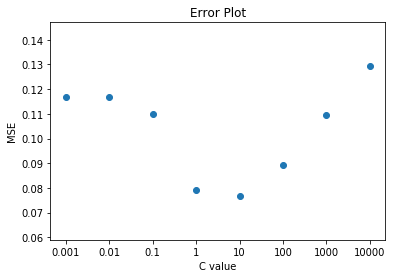

In [42]:
#Plotting the error graph
dumm_points=[1,2,3,4,5,6,7,8]
plt.scatter(dumm_points,MSE)
plt.xlabel('C value')
plt.ylabel('MSE')
plt.xticks(range(1,9),params['C'])
plt.title('Error Plot')
plt.show()

In [43]:
#Training the model with optimal C
tfidf_lr_model_grid = LogisticRegression(C=10,penalty='l2')
tfidf_lr_model_grid.fit(tfidf_train_data,balanced_train_label)
tfidf_lr_labels = tfidf_lr_model_grid.predict(tfidf_test_data)

In [44]:
#Finding the accuracy of test data
from sklearn.metrics import accuracy_score
score_tfidf_test = accuracy_score(balanced_test_label,tfidf_lr_labels)*float(100)
print("The accuracy score for test data with TfidfVectorizer is ----> "+str(score_tfidf_test))

The accuracy score for test data with TfidfVectorizer is ----> 91.99000000000001


In [45]:
#Finding the accuracy for train data
tfidf_lr_labels_train = tfidf_lr_model_grid.predict(tfidf_train_data)
score_tfidf_train = accuracy_score(balanced_train_label,tfidf_lr_labels_train)*float(100)
print("The accuracy score for train data with TfidfVectorizer is ----> "+str(score_tfidf_train))

The accuracy score for train data with TfidfVectorizer is ----> 95.85285714285715


### 2.Performing Pertubation test

In [58]:
#Applying TFIDF on pertub data
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_mod = CountVectorizer(dtype='float')
tfidf_mod_data = tfidf_mod.fit_transform(balanced_pertub_data.CleanedText)
tfidf_mod_data.shape

(5600, 11596)

In [59]:
#Normal model
tfidf_log_mod = LogisticRegression(C=0.1,penalty='l2')
tfidf_log_mod.fit(tfidf_mod_data,balanced_pertub_label)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
#Building pertubation matrix
epsi = np.random.normal(loc=0.0,scale=0.00000001,size=tfidf_mod_data.shape)  #Loss to be added with the data
pertubated_tfidf_data = tfidf_mod_data + epsi
pertubated_tfidf_data.shape

(5600, 11596)

In [61]:
from sklearn.linear_model import LogisticRegression
tfidf_pertubated_model = LogisticRegression(C=0.1,penalty='l2')
tfidf_pertubated_model.fit(pertubated_tfidf_data,balanced_pertub_label)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [168]:
lr_pert_tfidf = LogisticRegression(C=10,penalty='l2')
lr_pert_tfidf.fit(pertubation_mat_tfidf,balanced_train_label)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [169]:
np.var(tfidf_lr_model_grid.coef_)

0.4965028568301108

In [170]:
np.var(lr_pert_tfidf.coef_)

0.4965028552424498

In [66]:
#Calculating percentage change in wieghts  for each feature
wt_change = (tfidf_pertubated_model.coef_[0]-tfidf_log_mod.coef_[0])/(tfidf_log_mod.coef_[0])
wt_change

array([-2.59203485e-06,  1.12111609e-04,  1.58948482e-06, ...,
       -6.57894514e-04, -9.87179319e-06,  1.61658296e-05])

### Conclusion: The features are not multicollinear as the pertubated data and normal data weight vectors both nearly have the same variance

### 3. Finding Important Features

In [194]:
#Getting the important words for positive and negative class
pos_imp_words = tfidf_lr_model_grid.coef_[tfidf_lr_model_grid.coef_>0]
neg_imp_words = tfidf_lr_model_grid.coef_[tfidf_lr_model_grid.coef_<0]

In [195]:
#Function to get important postive words
def getposWords(pos_imp_words):
    x = sorted(pos_imp_words,reverse=True)
    y = x[0:10]
    indices= []
    for i in y:
        index = np.where(tfidf_lr_model_grid.coef_==i)
        indices.append(index[1])
    return indices

In [196]:
#Function to get important negative words
def getnegWords(neg_imp_words):
    x = sorted(neg_imp_words)
    y = x[0:10]
    indices= []
    for i in y:
        index = np.where(tfidf_lr_model_grid.coef_==i)
        indices.append(index[1])
    return indices

In [197]:
#Important postive words
tfidf_imp_pos_words = np.take(tfidf_model.get_feature_names(),getposWords(pos_imp_words))
tfidf_imp_pos_words

array([['great'],
       ['perfect'],
       ['best'],
       ['delici'],
       ['excel'],
       ['love'],
       ['amaz'],
       ['addict'],
       ['nice'],
       ['skeptic']], dtype='<U36')

In [198]:
#Important negative words
tfidf_imp_neg_words = np.take(tfidf_model.get_feature_names(),getnegWords(neg_imp_words))
tfidf_imp_neg_words

array([['worst'],
       ['disappoint'],
       ['aw'],
       ['terribl'],
       ['bland'],
       ['unfortun'],
       ['threw'],
       ['horribl'],
       ['stale'],
       ['unpleas']], dtype='<U36')

### 4.Using L1 Regularizer and checking how sparsity changes with lambda

In [172]:
lr_tfidf_l1 = LogisticRegression(C=10,penalty='l1')
lr_tfidf_l1.fit(tfidf_train_data,balanced_train_label)
tfidf_coef = lr_tfidf_l1.coef_
np.count_nonzero(tfidf_coef)

1080

In [173]:
lr_tfidf_l1 = LogisticRegression(C=1,penalty='l1')
lr_tfidf_l1.fit(tfidf_train_data,balanced_train_label)
tfidf_coef = lr_tfidf_l1.coef_
np.count_nonzero(tfidf_coef)

169

In [174]:
lr_tfidf_l1 = LogisticRegression(C=0.1,penalty='l1')
lr_tfidf_l1.fit(tfidf_train_data,balanced_train_label)
tfidf_coef = lr_tfidf_l1.coef_
np.count_nonzero(tfidf_coef)

2

### Conclusion: As lambda increases or C decreases the Sparsity increases

### 5.RandomizedSearchCV with TFIDF 

In [48]:
rand_params = {'C':np.random.uniform(0,100,50)}
clf_rand_tfidf = RandomizedSearchCV(lr_model,rand_params)

In [49]:
clf_rand_tfidf.fit(tfidf_train_data,balanced_train_label)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'C': array([82.74266, 97.09644, 97.61292, 75.11968, 29.74305, 96.90174,
       86.9722 , 33.06415, 40.65171, 93.13221, 35.72732, 70.9505 ,
       10.10757, 11.50923, 41.23413, 11.72254, 33.49817, 11.25884,
        3.79745, 77.0401 ,  7.80806, 81.8989 , 75.2715 , 91.59192,
      ...182,
       51.16344, 85.53229, 99.493  , 42.52082, 69.95143, 18.61137,
       12.57821, 30.07622])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [50]:
clf_rand_tfidf.best_params_

{'C': 12.584868473775368}

In [51]:
mean_test_scores_tf = clf_rand_tfidf.cv_results_['mean_test_score']

In [52]:
MSE = 1-mean_test_scores_tf
len(MSE)

10

In [53]:
rand_par = clf_rand_tfidf.cv_results_['params']
rand_par = [i['C'] for i in rand_par]

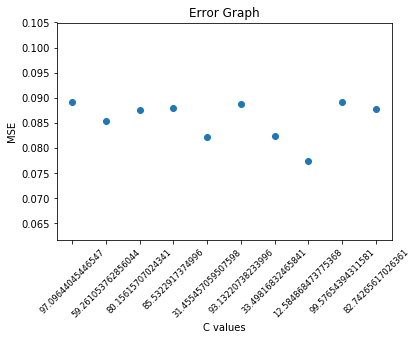

In [54]:
#Showing the error plot for test data
dumm_points = list(range(0,10))
plt.scatter(dumm_points,MSE)
param_str = [str(i) for i in rand_par]
plt.xlabel('C values')
plt.title('Error Graph')
plt.xticks(range(0,10),param_str,size='small',rotation='45')
plt.ylabel('MSE')
plt.show()

In [55]:
#Training the model with best C
lr_tfidf_rand = LogisticRegression(C= 4.159721219583057,penalty='l2')
lr_tfidf_rand.fit(tfidf_train_data,balanced_train_label)
tfidf_lr_rand_labels = lr_tfidf_rand.predict(tfidf_test_data)

In [56]:
#Finding the accuracy score with test data
score_tfidf_rand_test = accuracy_score(balanced_test_label,tfidf_lr_rand_labels)*float(100)
print("The accuracy with TFIDF vectorizer on test data is ----> "+str(score_tfidf_rand_test))

The accuracy with TFIDF vectorizer on test data is ----> 92.19000000000001


In [57]:
#Finding the accuracy score with train data
tfidf_lr_rand_labels_train = lr_tfidf_rand.predict(tfidf_train_data)
score_tfidf_rand_train = accuracy_score(balanced_train_label,tfidf_lr_rand_labels_train)*float(100)
print("The accuracy with TFIDF vectorizer on train data is ----> "+str(score_tfidf_rand_train))

The accuracy with TFIDF vectorizer on train data is ----> 94.91857142857143


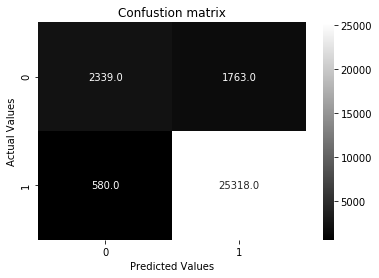

In [58]:
#Building the Confustion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cnf_tfidf_rand = confusion_matrix(balanced_test_label,tfidf_lr_rand_labels)
sns.heatmap(cnf_tfidf_rand,cmap=plt.cm.gray,annot=True,fmt='.1f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confustion matrix')
plt.show()

In [59]:
#Finding the tnr,fpr,fnr,tpr
tnr_tfidf_rand = cnf_tfidf_rand[0,0] 
fpr_tfidf_rand = cnf_tfidf_rand[0,1] 
fnr_tfidf_rand = cnf_tfidf_rand[1,0] 
tpr_tfidf_rand = cnf_tfidf_rand[1,1] 
print('The TNR for TFIDF is '+str(tnr_tfidf_rand))
print('The FPR for TFIDF is '+str(fpr_tfidf_rand))
print('The FNR for TFIDF is '+str(fnr_tfidf_rand))
print('The TPR for TFIDF is '+str(tpr_tfidf_rand))

The TNR for TFIDF is 2339
The FPR for TFIDF is 1763
The FNR for TFIDF is 580
The TPR for TFIDF is 25318


In [60]:
#Finding Precision and Recall
precision_tfidf_rand = tpr_tfidf_rand/(tpr_tfidf_rand+fpr_tfidf_rand)
recall_tfidf_rand = tpr_tfidf_rand/(tpr_tfidf_rand+fnr_tfidf_rand)
print("The precision of TFIDF is "+str(precision_tfidf_rand))
print("The recall of TFIDF is "+str(recall_tfidf_rand))

The precision of TFIDF is 0.9348990066836528
The recall of TFIDF is 0.9776044482199397


In [61]:
#Finding the F1 Score
f1_tfidf_rand = (2*precision_tfidf_rand*recall_tfidf_rand)/(precision_tfidf_rand+recall_tfidf_rand)
print("The F1 score of TFIDF Word2Vec is "+str(f1_tfidf_rand))

The F1 score of TFIDF Word2Vec is 0.955774929689122


# Conclusion
### 1. RandomizedSearchCV provided a better C value which have a better accuracy
### 2. There is no multicollinearity between the features as per pertubation test

# Word2Vec

In [62]:
import re
#Removing Html tags
def cleanHtml(sentence):
    cleanText = re.sub('<.*?>','',sentence)
    return cleanText
#Removing Punctuations
def cleanPunc(word):
    cleaned = re.sub(r'[#|!|?|\'|@|"]','',word)
    cleaned = re.sub(r'[,|.|(|)|\|/]',' ',word)
    return cleaned

In [63]:
#Retrieving 8000 data points from the sorted data
train_test_data = balanced_sorted_data.iloc[:100000]

In [64]:
#Filtering the sentences for using in word2vec
from gensim.models import Word2Vec
final_sentences = []
for sentence in train_test_data.Text.values:    
    sent = cleanHtml(sentence)       #Cleaning the html tags from the sentences
    filtered_sentence = []           #The filtered sentences to be stored in this list
    for word in sent.split():    #Looping through each word
        for cleaned_word in cleanPunc(word).split():   #Cleaning the punctuations from each word
            if(cleaned_word.isalpha()):              
                filtered_sentence.append(cleaned_word.lower())   #Converting the cleaned word to lowercase
            else:
                continue
    final_sentences.append(filtered_sentence)      #Inserting each filtered sentence to the final list

F:\Anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [65]:
len(final_sentences)

100000

In [66]:
#Training the Word2Vec model
train_sentences = final_sentences[:70000]
w2v_model = Word2Vec(train_sentences,size=50,workers = 4)

In [67]:
words = set(w2v_model.wv.vocab)
len(words)

15511

# Average Wod2Vec

In [68]:
#Building model for average word2vec
sent_vectors = []
for sentence in final_sentences:    
    sentence_vectors = np.zeros(50)    #Building word vectors and initializing with 0
    count = 0   #Counting the total number of words in the sentence
    for word in sentence:
        try:
            count+=1           
            w2v = w2v_model.wv[word]    #Appling word2vec for each word
            sentence_vectors+=w2v        #Adding word2vec of each word to sentence vectors
        except:
            pass
    sentence_vectors/=count            #Computing average word2vec
    sent_vectors.append(sentence_vectors)

In [69]:
sent_vectors_df = pd.DataFrame(sent_vectors)
sent_vectors_df.shape

(100000, 50)

In [70]:
#Building 70% and 30% train and test data
avgw2v_train_data = sent_vectors_df.iloc[:70000]
avgw2v_test_data = sent_vectors_df.iloc[70000:100000]
print(avgw2v_train_data.shape)
avgw2v_test_data.shape

(70000, 50)


(30000, 50)

### 1. Applying Average Word2Vec with GridSearchCV & L2 Regularizer

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr_model = LogisticRegression()
param_w2v = {'C':[10**(-3),10**(-2),10**(-1),10**(0),10**(1),10**(2),10**(3)]}
grid_clf_w2v = GridSearchCV(lr_model,param_w2v,scoring='accuracy')

In [72]:
#Fitting the GridSearchCV to find the best params
grid_clf_w2v.fit(avgw2v_train_data,balanced_train_label)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [73]:
grid_clf_w2v.best_params_

{'C': 100}

In [74]:
mean_test_scores_tf = grid_clf_w2v.cv_results_['mean_test_score']
MSE = 1-mean_test_scores_tf

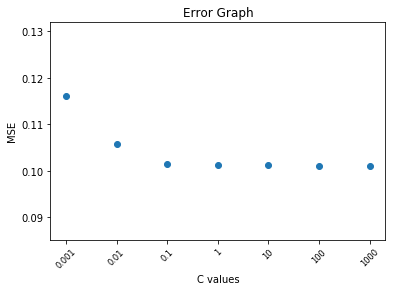

In [75]:
#Showing the error plot for test data
dumm_points = list(range(0,7))
plt.scatter(dumm_points,MSE)
param_str = [str(i) for i in param_w2v['C']]
plt.xlabel('C values')
plt.title('Error Graph')
plt.xticks(range(0,7),param_str,size='small',rotation='45')
plt.ylabel('MSE')
plt.show()

In [76]:
#Building the model with optimal C
avgw2v_lr_model_grid = LogisticRegression(C=100,penalty='l2')
avgw2v_lr_model_grid.fit(avgw2v_train_data,balanced_train_label)
avgw2v_lr_model_label = avgw2v_lr_model_grid.predict(avgw2v_test_data)

In [77]:
#Calculating the accuracy for the test data
from sklearn.metrics import accuracy_score
score_avgw2v_test = accuracy_score(balanced_test_label,avgw2v_lr_model_label)*float(100)
print("The accuracy for test data with Average Word2Vec model is ----> "+str(score_avgw2v_test))

The accuracy for test data with Average Word2Vec model is ----> 88.4


In [78]:
#Calculating accuracy for train data
avgw2v_lr_model_label_train = avgw2v_lr_model_grid.predict(avgw2v_train_data)
score_avgw2v_train = accuracy_score(balanced_train_label,avgw2v_lr_model_label_train)*float(100)
print("The accuracy for train data with Average Word2Vec model is ----> "+str(score_avgw2v_train))

The accuracy for train data with Average Word2Vec model is ----> 89.91285714285713


### 2.Using L1 Regularizer and checking how sparsity changes with lambda

In [88]:
lr_model_l1 = LogisticRegression(C=100,penalty='l1')
lr_model_l1.fit(avgw2v_train_data,balanced_train_label)
sparse_coef = lr_model_l1.coef_
np.count_nonzero(sparse_coef)

49

In [89]:
lr_model_l1 = LogisticRegression(C=10,penalty='l1')
lr_model_l1.fit(avgw2v_train_data,balanced_train_label)
sparse_coef = lr_model_l1.coef_
np.count_nonzero(sparse_coef)

48

In [90]:
lr_model_l1 = LogisticRegression(C=1,penalty='l1')
lr_model_l1.fit(avgw2v_train_data,balanced_train_label)
sparse_coef = lr_model_l1.coef_
np.count_nonzero(sparse_coef)

27

In [91]:
lr_model_l1 = LogisticRegression(C=0.1,penalty='l1')
lr_model_l1.fit(avgw2v_train_data,balanced_train_label)
sparse_coef = lr_model_l1.coef_
np.count_nonzero(sparse_coef)

8

### Conclusion: As lambda increases or C decreases the Sparsity increases

### 3.RandomizedSearchCV with Average Word2Vec

In [79]:
from sklearn.model_selection import RandomizedSearchCV
lr_model_rand = LogisticRegression()
param_rand = {"C":np.random.uniform(10,1000,50)}
random_clf = RandomizedSearchCV(lr_model_rand,param_rand,scoring='accuracy')

In [80]:
random_clf.fit(avgw2v_train_data,balanced_train_label)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'C': array([480.69177, 604.99881, 520.64279, 497.81827, 607.404  , 513.82529,
       420.23901, 829.85908, 518.33262, 345.11474, 227.15298, 701.47697,
       373.17812, 548.12143, 725.43937, 814.35234, 781.47587, 247.42879,
       882.81459, 881.07749, 823.26149, 228.4444 , 889....    941.34589, 747.32002, 835.83886, 757.31158, 823.59916, 503.92152,
       986.30968, 936.88817])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [81]:
random_clf.best_params_

{'C': 700.764153937091}

In [82]:
mean_test_scores_tf = random_clf.cv_results_['mean_test_score']
MSE = 1-mean_test_scores_tf
len(MSE)

10

In [83]:
rand_par = random_clf.cv_results_['params']
rand_par = [i['C'] for i in rand_par]

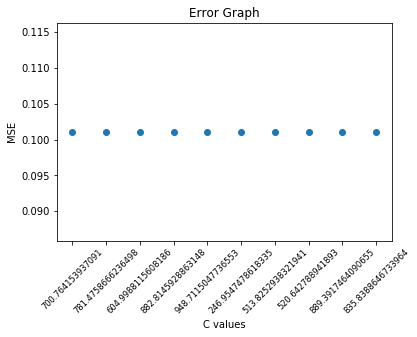

In [84]:
#Showing the error plot for test data
dumm_points = list(range(0,10))
plt.scatter(dumm_points,MSE)
param_str = [str(i) for i in rand_par]
plt.xlabel('C values')
plt.title('Error Graph')
plt.xticks(range(0,10),param_str,size='small',rotation='45')
plt.ylabel('MSE')
plt.show()

In [85]:
#Building the model with optimal C
avgw2v_lr_model_rand = LogisticRegression(C=562.1450405861694, penalty='l2')
avgw2v_lr_model_rand.fit(avgw2v_train_data,balanced_train_label)
avgw2v_lr_model_rand_label = avgw2v_lr_model_rand.predict(avgw2v_test_data)

In [86]:
score_avgw2v_rand_test = accuracy_score(balanced_test_label,avgw2v_lr_model_rand_label)*float(100)
print("The accuracy for test data with Average Word2Vec model is ----> "+str(score_avgw2v_rand_test))

The accuracy for test data with Average Word2Vec model is ----> 88.39666666666666


In [87]:
#Calculating accuracy for train data
avgw2v_lr_model_rand_label_train = avgw2v_lr_model_rand.predict(avgw2v_train_data)
score_avgw2v_rand_train = accuracy_score(balanced_train_label,avgw2v_lr_model_rand_label_train)*float(100)
print("The accuracy for train data with Average Word2Vec model is ----> "+str(score_avgw2v_rand_train))

The accuracy for train data with Average Word2Vec model is ----> 89.91


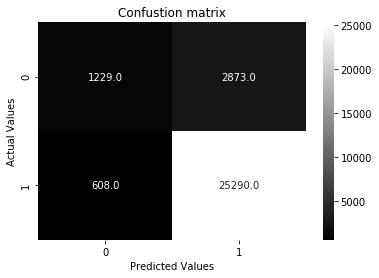

In [88]:
#Building the Confustion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cnf_avgw2v_rand = confusion_matrix(balanced_test_label,avgw2v_lr_model_rand_label)
sns.heatmap(cnf_avgw2v_rand,cmap=plt.cm.gray,annot=True,fmt='.1f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confustion matrix')
plt.show()

In [89]:
#Finding the tnr,fpr,fnr,tpr
tnr_avgw2v_rand = cnf_avgw2v_rand[0,0] 
fpr_avgw2v_rand = cnf_avgw2v_rand[0,1] 
fnr_avgw2v_rand = cnf_avgw2v_rand[1,0] 
tpr_avgw2v_rand = cnf_avgw2v_rand[1,1] 
print('The TNR for Average Word2vec is '+str(tnr_avgw2v_rand))
print('The FPR for Average Word2vec is '+str(fpr_avgw2v_rand))
print('The FNR for Average Word2vec is '+str(fnr_avgw2v_rand))
print('The TPR for Average Word2vec is '+str(tpr_avgw2v_rand))

The TNR for Average Word2vec is 1229
The FPR for Average Word2vec is 2873
The FNR for Average Word2vec is 608
The TPR for Average Word2vec is 25290


In [90]:
#Finding Precision and Recall
precision_avgw2v_rand = tpr_avgw2v_rand/(tpr_avgw2v_rand+fpr_avgw2v_rand)
recall_avgw2v_rand = tpr_avgw2v_rand/(tpr_avgw2v_rand+fnr_avgw2v_rand)
print("The precision of Average Word2Vec is "+str(precision_avgw2v_rand))
print("The recall of Average Word2Vec is "+str(recall_avgw2v_rand))

The precision of Average Word2Vec is 0.8979867201647552
The recall of Average Word2Vec is 0.9765232836512472


In [91]:
#Finding the F1 Score
f1_avgw2v_rand = (2*precision_avgw2v_rand*recall_avgw2v_rand)/(precision_avgw2v_rand+recall_avgw2v_rand)
print("The F1 score of Average Word2Vec is "+str(f1_avgw2v_rand))

The F1 score of Average Word2Vec is 0.9356097741440225


# Conclusion
###  GridSearchCV provided a better C value which have a better accuracy


# TFIDF Weighted Word2Vec

In [92]:
#Taking 10k data points
train_data = balanced_sorted_data.iloc[:7000]
train_test_data = balanced_sorted_data.iloc[:10000]
fin_sentences = final_sentences[:10000]

In [93]:
#Re-modeling TfidfVectorizer on train data
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_model = TfidfVectorizer()   #Initilaizing the TfidfVectorizer  
tf_idf_model_data = tf_idf_model.fit(train_data.Text.values)   #Training the vectorizer

In [94]:
#Building the vectors for final data
tf_idf_model_final = tf_idf_model.transform(train_test_data.Text.values)
tf_idf_model_final.shape

(10000, 19568)

In [95]:
#Building the Weighted TFIDF W2V
tf_features = tf_idf_model.get_feature_names()    #Retrieving the tfidf feature names
weighted_sentences = [];
row = 0;
for sentence in fin_sentences:
    sum_vector = np.zeros(50)     #Building word vectors and initializing with 0
    weighted_sum = 0;             #Initializing the weighted sum to 0
    for word in sentence:         #Looping through each word
        try: 
            w2v = w2v_model.wv[word]         #Applying the word2vec model on each word
            tf_idf = tf_idf_model_final[row,tf_features.index(word)]      #Retrieving the tfidf value for the corresponding word
            sum_vector += (w2v*tf_idf)          #Computing tfidf weighted w2v
            weighted_sum += tf_idf              #Computing the total tfidf weight
        except:
            pass
    sum_vector/=weighted_sum              #Final tfidf weighted w2v
    weighted_sentences.append(sum_vector)
    row += 1 

In [96]:
#Converting the weighted sentences list to a DataFrame
weighted_df = pd.DataFrame(weighted_sentences) 
weighted_df.shape

(10000, 50)

In [97]:
#Building 70% and 30% train-test data set
tfidfw2v_train_data = weighted_df.iloc[0:7000,:]
tfidfw2v_test_data = weighted_df.iloc[7000:10000]
print(tfidfw2v_train_data.shape)
tfidfw2v_test_data.shape

(7000, 50)


(3000, 50)

### 1. Applying TFIDF Word2Vec with GridSearchCV & L2 Regularizer


In [98]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
lr_model = LogisticRegression()
param_tfidf = {'C':[10**(-3),10**(-2),10**(-1),10**(0),10**(1),10**(2),10**(3),10**(4),10**(5)]}
grid_clf_tfw2v = GridSearchCV(lr_model,param_tfidf,scoring='accuracy')

In [100]:
grid_clf_tfw2v.fit(tfidfw2v_train_data,balanced_train_label[:7000])

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [101]:
grid_clf_tfw2v.best_params_

{'C': 1000}

In [105]:
mean_test_scores_tf = grid_clf_tfw2v.cv_results_['mean_test_score']
MSE = 1-mean_test_scores_tf

9

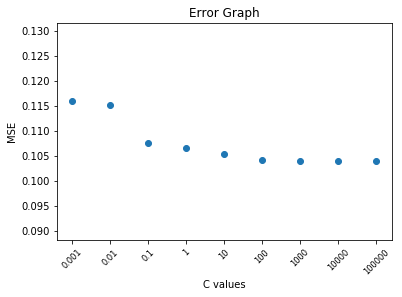

In [108]:
#Showing the error plot for test data
dumm_points = list(range(0,9))
plt.scatter(dumm_points,MSE)
param_str = [str(i) for i in param_tfidf['C']]
plt.xlabel('C values')
plt.title('Error Graph')
plt.xticks(range(0,9),param_str,size='small',rotation='45')
plt.ylabel('MSE')
plt.show()

In [112]:
#Building the model with optimal C
tfw2v_lr_model_grid = LogisticRegression(C=1000,penalty='l2')
tfw2v_lr_model_grid.fit(tfidfw2v_train_data,balanced_train_label[:7000])
tfw2v_lr_model_label = tfw2v_lr_model_grid.predict(tfidfw2v_test_data)

In [113]:
#Calculating the accuracy for the test data
from sklearn.metrics import accuracy_score
score_tfw2v_test = accuracy_score(balanced_test_label[:3000],tfw2v_lr_model_label)*float(100)
print("The accuracy for test data with TFIDF Weighted Word2Vec model is ----> "+str(score_tfw2v_test))

The accuracy for test data with TFIDF Weighted Word2Vec model is ----> 83.03333333333333


In [114]:
#Calculating the accuracy for the train data
tfw2v_lr_model_label_train = tfw2v_lr_model_grid.predict(tfidfw2v_train_data)
score_tfw2v_train = accuracy_score(balanced_train_label[:7000],tfw2v_lr_model_label_train)*float(100)
print("The accuracy for train data with TFIDF Weighted Word2Vec model is ----> "+str(score_tfw2v_train))

The accuracy for train data with TFIDF Weighted Word2Vec model is ----> 89.88571428571429


### 2.Using L1 Regularizer and checking how sparsity changes with lambda


In [127]:
lr_model_l1 = LogisticRegression(C=10000,penalty='l1')
lr_model_l1.fit(tfidfw2v_train_data,balanced_train_label)
sparse_coef = lr_model_l1.coef_
np.count_nonzero(sparse_coef)

50

In [130]:
lr_model_l1 = LogisticRegression(C=10,penalty='l1')
lr_model_l1.fit(tfidfw2v_train_data,balanced_train_label)
sparse_coef = lr_model_l1.coef_
np.count_nonzero(sparse_coef)

45

In [131]:
lr_model_l1 = LogisticRegression(C=1,penalty='l1')
lr_model_l1.fit(tfidfw2v_train_data,balanced_train_label)
sparse_coef = lr_model_l1.coef_
np.count_nonzero(sparse_coef)

28

In [132]:
lr_model_l1 = LogisticRegression(C=0.1,penalty='l1')
lr_model_l1.fit(tfidfw2v_train_data,balanced_train_label)
sparse_coef = lr_model_l1.coef_
np.count_nonzero(sparse_coef)

12

### Conclusion: As lambda increases or C decreases the Sparsity increases

### 3.RandomizedSearchCV with TFIDF Word2Vec

In [115]:
lr_model_rand = LogisticRegression()
param_rand = {"C":np.random.uniform(10,100000,100)}
random_clf = RandomizedSearchCV(lr_model_rand,param_rand,scoring='accuracy')

In [117]:
random_clf.fit(tfidfw2v_train_data,balanced_train_label[:7000])

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'C': array([75272.55158, 92075.98033, ..., 80424.73204, 80622.38737])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [118]:
random_clf.best_params_

{'C': 38173.48159133787}

In [119]:
mean_test_scores_tf = random_clf.cv_results_['mean_test_score']
MSE = 1-mean_test_scores_tf
len(MSE)

10

In [120]:
rand_par = random_clf.cv_results_['params']
rand_par = [i['C'] for i in rand_par]

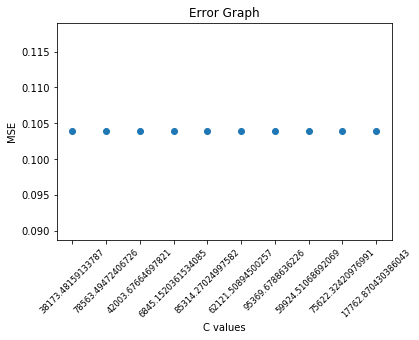

In [121]:
#Showing the error plot for test data
dumm_points = list(range(0,10))
plt.scatter(dumm_points,MSE)
param_str = [str(i) for i in rand_par]
plt.xlabel('C values')
plt.title('Error Graph')
plt.xticks(range(0,10),param_str,size='small',rotation='45')
plt.ylabel('MSE')
plt.show()

In [123]:
#Building the model with optimal C
tfw2v_lr_model_rand = LogisticRegression(C=38173.48159133787,penalty='l2')
tfw2v_lr_model_rand.fit(tfidfw2v_train_data,balanced_train_label[:7000])
tfw2v_lr_model_rand_label = tfw2v_lr_model_rand.predict(tfidfw2v_test_data)

In [124]:
#Calculating the accuracy for the test data
from sklearn.metrics import accuracy_score
score_tfw2v_rand_test = accuracy_score(balanced_test_label[:3000],tfw2v_lr_model_rand_label)*float(100)
print("The accuracy for test data with TFIDF Weighted Word2Vec model is ----> "+str(score_tfw2v_rand_test))

The accuracy for test data with TFIDF Weighted Word2Vec model is ----> 83.03333333333333


In [125]:
#Calculating the accuracy for the train data
tfw2v_lr_model_rand_label_train = tfw2v_lr_model_rand.predict(tfidfw2v_train_data)
score_tfw2v_rand_train = accuracy_score(balanced_train_label[:7000],tfw2v_lr_model_label_train)*float(100)
print("The accuracy for train data with TFIDF Weighted Word2Vec model is ----> "+str(score_tfw2v_rand_train))

The accuracy for train data with TFIDF Weighted Word2Vec model is ----> 89.88571428571429


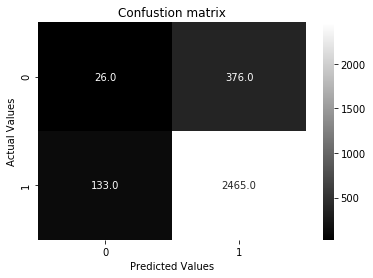

In [127]:
#Building the Confustion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cnf_tfidf_rand = confusion_matrix(balanced_test_label[:3000],tfw2v_lr_model_rand_label)
sns.heatmap(cnf_tfidf_rand,cmap=plt.cm.gray,annot=True,fmt='.1f')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confustion matrix')
plt.show()

In [128]:
#Finding the tnr,fpr,fnr,tpr
tnr_tfw2v_rand = cnf_tfidf_rand[0,0] 
fpr_tfw2v_rand = cnf_tfidf_rand[0,1] 
fnr_tfw2v_rand = cnf_tfidf_rand[1,0] 
tpr_tfw2v_rand = cnf_tfidf_rand[1,1] 
print('The TNR for TFIDF Word2vec is '+str(tnr_tfw2v_rand))
print('The FPR for TFIDF Word2vec is '+str(fpr_tfw2v_rand))
print('The FNR for TFIDF Word2vec is '+str(fnr_tfw2v_rand))
print('The TPR for TFIDF Word2vec is '+str(tpr_tfw2v_rand))

The TNR for TFIDF Word2vec is 26
The FPR for TFIDF Word2vec is 376
The FNR for TFIDF Word2vec is 133
The TPR for TFIDF Word2vec is 2465


In [129]:
#Finding Precision and Recall
precision_tfw2v_rand = tpr_tfw2v_rand/(tpr_tfw2v_rand+fpr_tfw2v_rand)
recall_tfw2v_rand = tpr_tfw2v_rand/(tpr_tfw2v_rand+fnr_tfw2v_rand)
print("The precision of TFIDF Word2Vec is "+str(precision_tfw2v_rand))
print("The recall of TFIDF Word2Vec is "+str(recall_tfw2v_rand))

The precision of TFIDF Word2Vec is 0.8676522351284759
The recall of TFIDF Word2Vec is 0.9488067744418783


In [130]:
#Finding the F1 Score
f1_tfw2v_rand = (2*precision_tfw2v_rand*recall_tfw2v_rand)/(precision_tfw2v_rand+recall_tfw2v_rand)
print("The F1 score of TFIDF Word2Vec is "+str(f1_tfw2v_rand))

The F1 score of TFIDF Word2Vec is 0.906416620702335


# Conclusion
### Both Gridsearch and randomsearch provided similar results

# Summary

In [200]:
summary = {'Model':['BOW','TFIDF','Average Word2Vec','TFIDF Word2Vec'],'GridSearch-C':['1','10','100','1000'],'RandomSearch-C':['0.42887209086040123','44.13977472737556','116.14474242603184','46440.36927893156'],'Least Test Error':[str(100-score_bow_test_rand),str(100-score_tfidf_rand_test),str(100-score_avgw2v_test),str(100-score_tfw2v_test)],'Best F1':['0.9537542758868331','0.955774929689122','0.9356097741440225','0.906416620702335']}
summary_df = pd.DataFrame(summary)
summary_df

,Model,GridSearch-C,RandomSearch-C,Least Test Error,Best F1
0,BOW,1,0.42887209086040123,8.156666666666666,0.9537542758868331
1,TFIDF,10,44.13977472737556,7.809999999999988,0.955774929689122
2,Average Word2Vec,100,116.14474242603184,11.599999999999994,0.9356097741440225
3,TFIDF Word2Vec,1000,46440.36927893156,16.96666666666667,0.906416620702335


# TFIDF performed best among all the models